In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Acayucan.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
0,29/01/2019,00:00,280,310,9.43,22.9,22.2,81,998.2,0.0,4.7
1,29/01/2019,01:00,270,288,4.39,18.2,20.1,90,998.9,0.0,0.0
2,29/01/2019,02:00,261,278,5.70,21.0,18.7,95,999.6,0.0,0.0
3,29/01/2019,03:00,256,273,5.32,13.0,18.2,95,1000.0,0.0,0.0
4,29/01/2019,04:00,258,271,3.71,8.2,17.3,97,1000.3,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,FECHA
0,280,310,9.43,22.9,22.2,81,998.2,0.0,4.7,2019-01-29 00:00:00
1,270,288,4.39,18.2,20.1,90,998.9,0.0,0.0,2019-01-29 01:00:00
2,261,278,5.70,21.0,18.7,95,999.6,0.0,0.0,2019-01-29 02:00:00
3,256,273,5.32,13.0,18.2,95,1000.0,0.0,0.0,2019-01-29 03:00:00
4,258,271,3.71,8.2,17.3,97,1000.3,0.0,0.0,2019-01-29 04:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,200.679012,213.938272,6.430494,19.062963,20.943210,91.629630,1002.809877,0.002469,107.895062
std,59.328709,61.500680,3.532508,7.375270,3.267566,10.867894,1.972537,0.015615,186.655756
min,48.000000,62.000000,1.060000,4.700000,15.300000,63.000000,998.200000,0.000000,0.000000
25%,154.000000,170.000000,3.800000,13.400000,18.900000,87.000000,1001.300000,0.000000,0.000000
50%,200.000000,221.000000,5.300000,18.500000,20.200000,97.000000,1003.100000,0.000000,0.000000
75%,243.000000,271.000000,8.990000,24.300000,22.800000,100.000000,1004.400000,0.000000,121.300000
max,291.000000,317.000000,15.560000,34.600000,29.000000,100.000000,1006.000000,0.100000,752.700000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,FECHA
20,136,155,13.30,29.3,24.1,83,1003.6,0.0,596.5,2019-01-29 20:00:00
21,139,154,15.56,34.2,24.5,82,1003.2,0.0,475.2,2019-01-29 21:00:00
44,146,146,6.35,18.0,24.9,73,1001.9,0.0,418.2,2019-01-30 20:00:00
47,276,281,7.28,21.5,24.3,79,1001.6,0.0,72.0,2019-01-30 23:00:00
64,137,135,4.28,17.4,24.8,79,1004.9,0.0,381.7,2019-01-31 16:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS           200.679012
DIRR           213.938272
RAPVIENTO2       6.430494
RAPRAFAGA2      19.062963
TEMP            20.943210
HR              91.629630
PB            1002.809877
PREC             0.002469
RADSOL         107.895062
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

20.943209876543218

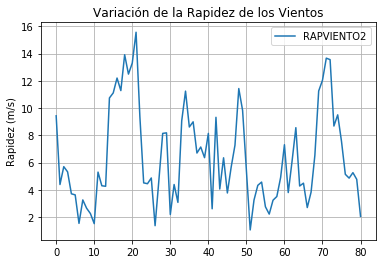

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

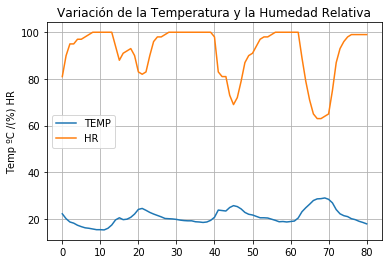

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

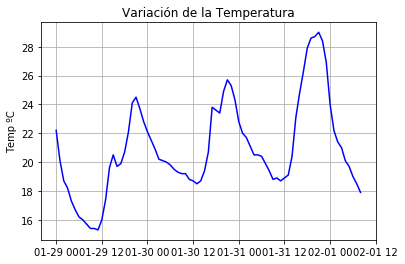

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

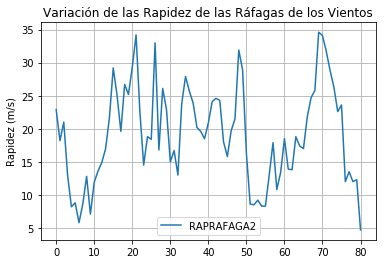

In [15]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPRAFAGA2.plot(); plt.legend(loc='best')
plt.title("Variación de las Rapidez de las Ráfagas de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

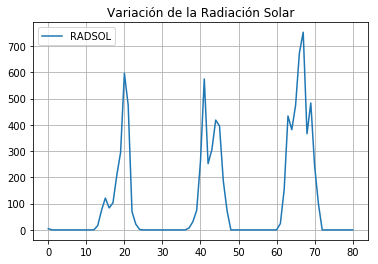

In [16]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RADSOL.plot(); plt.legend(loc='best')
plt.title("Variación de la Radiación Solar")
plt.grid(True)
plt.show()